In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('../data/cleaned_insta.csv')

In [3]:
# Separate features and target variable
X = df[['Follower count:', 'Media Type:','Tags','clean_captions', 'hour', 'dayofweek', 'month']]
y = df['Likes']
    
# Define a ColumnTransformer 
# StandardScaler for Followers and Tags 
# CountVectorizer for captions
column_trans = ColumnTransformer(
    [('numeric', StandardScaler(), ['Follower count:','Tags']),
    ('caption', CountVectorizer(), 'clean_captions')],
    remainder='passthrough', verbose_feature_names_out=True)

# Fit and transform the data
X_transformed = column_trans.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_regressor.predict(X_test)

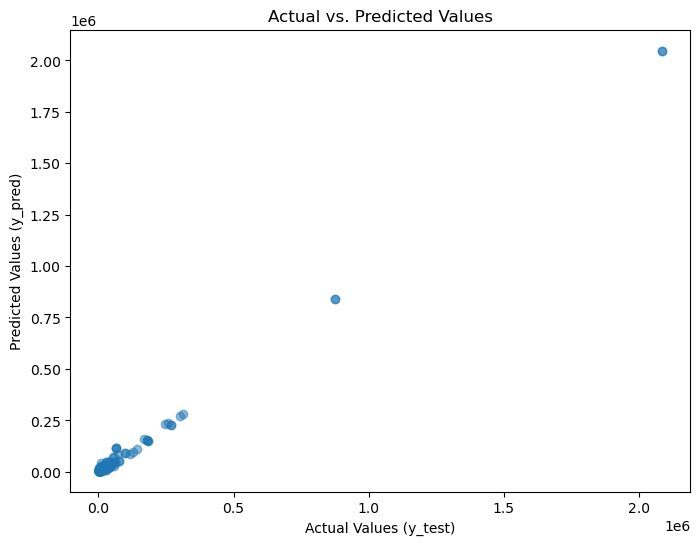

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.show()

In [6]:
#transform y_test into an array
y_test2 = y_test.values

# get rid of anything above 400000

# Remove the largest numbers from the array
y_pred_zoom = y_pred[y_pred<400000]

# Remove the corresponding values from y_test
y_test_zoom = y_test2[y_test2<400000]

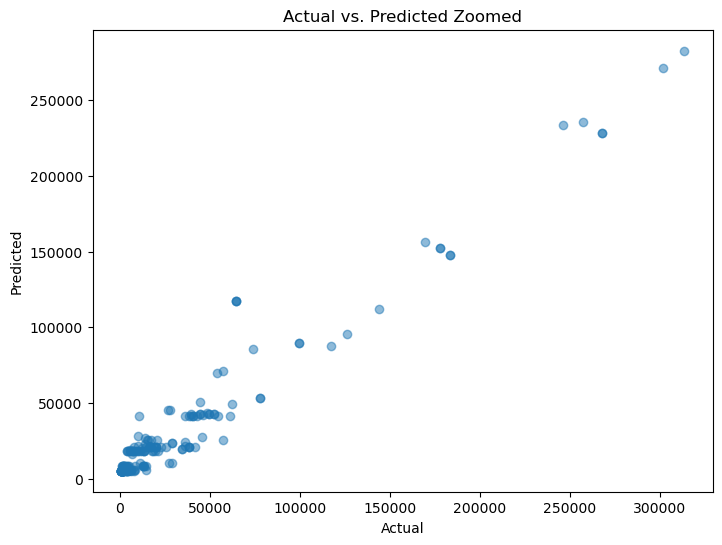

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_zoom, y_pred_zoom, alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Zoomed')

# Show the plot
plt.show()

In [8]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 14302.949892210805


In [9]:
# Assuming you have already trained your Gradient Boosting Regressor
# gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_regressor.feature_importances_

# Assuming you want to associate feature importances with their names
# Extract the names of the transformed features
column_names = column_trans.get_feature_names_out(input_features=['Follower count:', 'Media Type:', 'Tags', 'clean_captions', 'hour', 'dayofweek', 'month'])

# Create a list of tuples with feature names and their importances
feature_importance_tuples = list(zip(column_names, feature_importances))

# Sort the list of tuples by importance in descending order
sorted_feature_importance = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Print sorted feature importances
for feature_name, importance in sorted_feature_importance:
    print(f"{feature_name}: {importance}")

caption__pumaxdua: 0.18343067070373784
caption__lorenzoposocco: 0.10013655522916509
caption__lookbook: 0.08900465236821718
caption__red: 0.07669657615410763
caption__jennaortega: 0.07374358563978418
caption__theo123456: 0.07294197496597013
caption__violets: 0.05877856504258899
caption__sneak: 0.05310462225649454
caption__shot: 0.042723294009601565
caption__offwhite: 0.03284812400604805
remainder__month: 0.026665220278516505
remainder__dayofweek: 0.02557527074510758
caption__classics: 0.015211053759076599
numeric__Follower count:: 0.012524641083407223
caption__wegotnow: 0.011822709330479513
remainder__hour: 0.011315137876364392
caption__snkrs: 0.008884884939167748
caption__彼しか出来ないやり方でプレーする: 0.008478028617877291
caption__played: 0.007617762646801576
caption__rest: 0.007473376668759545
remainder__Media Type:: 0.006992094260125772
caption__同じゲームを: 0.006082307706306377
caption__mancity: 0.005890230468451804
caption__kit: 0.0056128987399017075
caption__ready: 0.004995256457375739
numeric__Ta